In [355]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [357]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [360]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [362]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/carde/Documents/Module 10/Starter_Code/Resources/hawaii.sqlite")

In [364]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [366]:
# View all of the classes that automap found
print("Available classes:", Base.classes.keys())

Available classes: ['station', 'measurement']


In [368]:
# Save references to each table
Measurement = Base.classes['measurement'] 
Station = Base.classes['station'] 

In [370]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [373]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date in the data set: {recent_date[0]}")


Most recent date in the data set: 2017-08-23


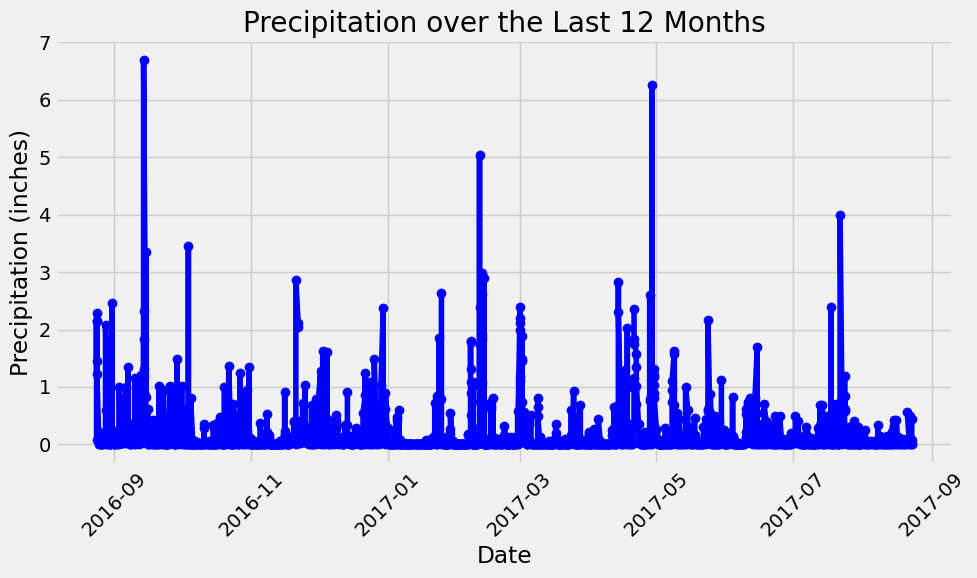

In [375]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import pandas as pd
from datetime import datetime, timedelta  # Ensure this import is present

# Step 1: Query the most recent date in the dataset
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Convert the latest date to a datetime object
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')  # This should now work without errors

# Step 2: Calculate the date one year from the last date in the dataset
one_year_ago = latest_date - timedelta(days=365)

# Step 3: Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= one_year_ago).order_by(Measurement.date).all()

# Step 4: Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Step 5: Sort the DataFrame by date (already sorted by the query, but ensuring it)
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])  # Convert to datetime
precipitation_df.sort_values('date', inplace=True)

# Plot the data (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['date'], precipitation_df['precipitation'], marker='o', linestyle='-', color='b')
plt.title('Precipitation over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

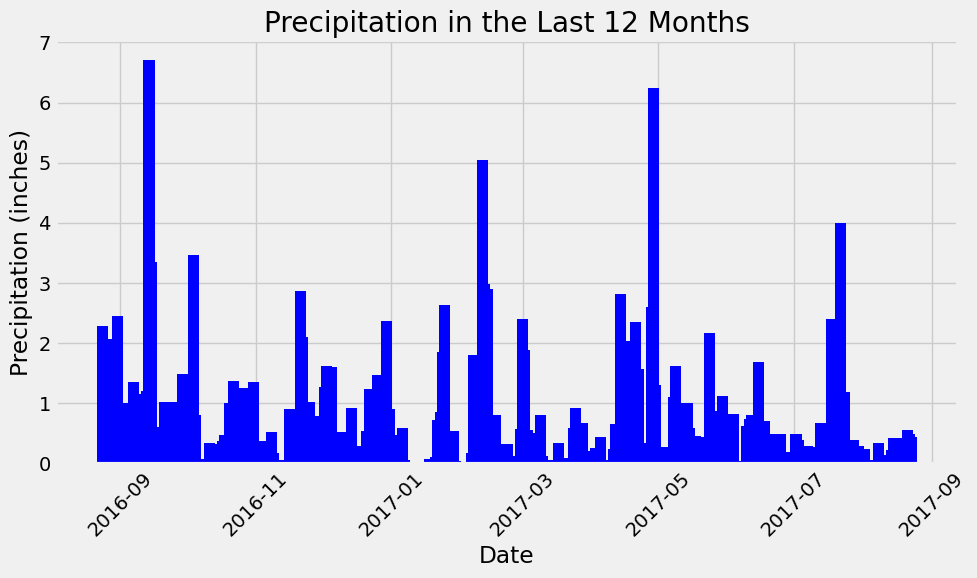

In [376]:
# Use Pandas to calculate the summary statistics for the precipitation data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], color='blue', width=5)
plt.title('Precipitation in the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Close the session
session.close()

# Exploratory Station Analysis

In [379]:
# Design a query to calculate the total number of stations in the dataset
ecent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date in the data set: {recent_date[0]}")

Most recent date in the data set: 2017-08-23


In [380]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
from sqlalchemy import func

# Step 1: Query the most active stations (stations with the most rows)
active_stations = session.query(
    Measurement.station, 
    func.count(Measurement.station).label('station_count')  # Count the rows for each station
).group_by(Measurement.station)  # Group by station

# Order by the count in descending order
active_stations = active_stations.order_by(func.count(Measurement.station).desc())

# Step 2: Fetch the results
active_stations_list = active_stations.all()

# Step 3: Print the results
for station, count in active_stations_list:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [381]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0]  # Assuming the first station is the most active

# Step 2: Query for the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs).label('lowest_temp'),
    func.max(Measurement.tobs).label('highest_temp'),
    func.avg(Measurement.tobs).label('average_temp')
).filter(Measurement.station == most_active_station_id).all()

# Step 3: Fetch the results
lowest, highest, average = temperature_stats[0]  # Unpack the results

# Step 4: Print the results
print(f"Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {lowest}")
print(f"Highest Temperature: {highest}")
print(f"Average Temperature: {average}")


Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


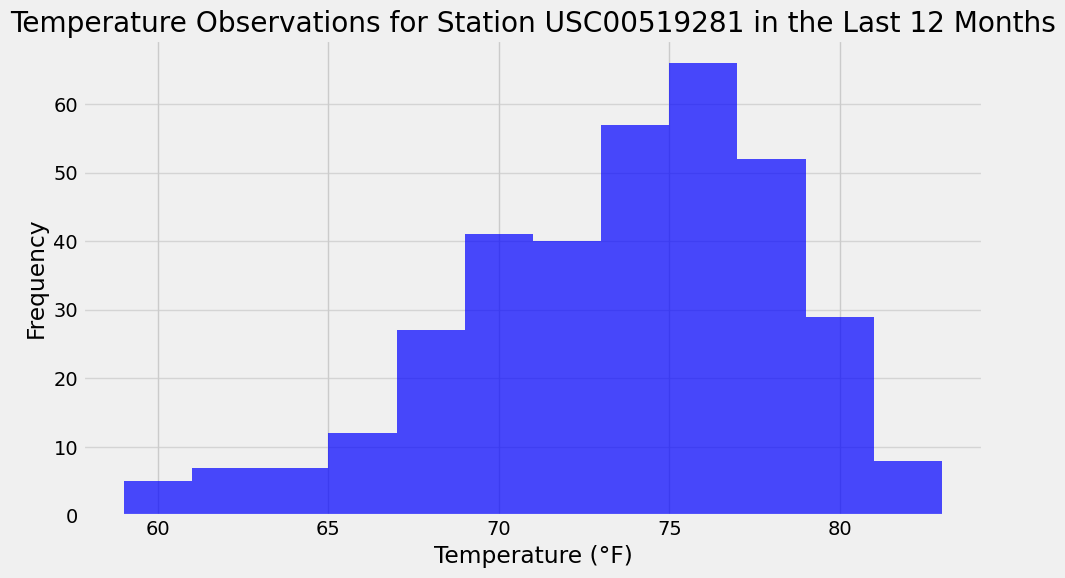

In [382]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_id = active_stations[0][0]  # Assuming the first station is the most active

# Step 2: Calculate the date one year from the last date in the dataset
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')
one_year_ago = latest_date - timedelta(days=365)

# Step 3: Query the last 12 months of temperature observation data for this station
temperature_data = session.query(Measurement.tobs).filter(
    Measurement.station == most_active_station_id,
    Measurement.date >= one_year_ago
).all()

# Step 4: Convert the results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['temperature'])

# Step 5: Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['temperature'], bins=12, color='blue', alpha=0.7)
plt.title(f'Temperature Observations for Station {most_active_station_id} in the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Close Session

In [384]:
# Close Session
session.close()